<a href="https://colab.research.google.com/github/anushzz/compute_tasks/blob/main/task6/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Loading Data**

In [3]:

# load dataset

df=pd.read_csv('/content/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [4]:
#split dataset in features and target variable
x=df.drop(['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**Splitting Data**

In [6]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [7]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)


**Evaluating Model**

In [8]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

Accuracy: 69.48051948051948


array([[76, 23],
       [24, 31]])

**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [9]:
!pip install graphviz
!pip install six
!pip install pydotplus

In [15]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [11]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

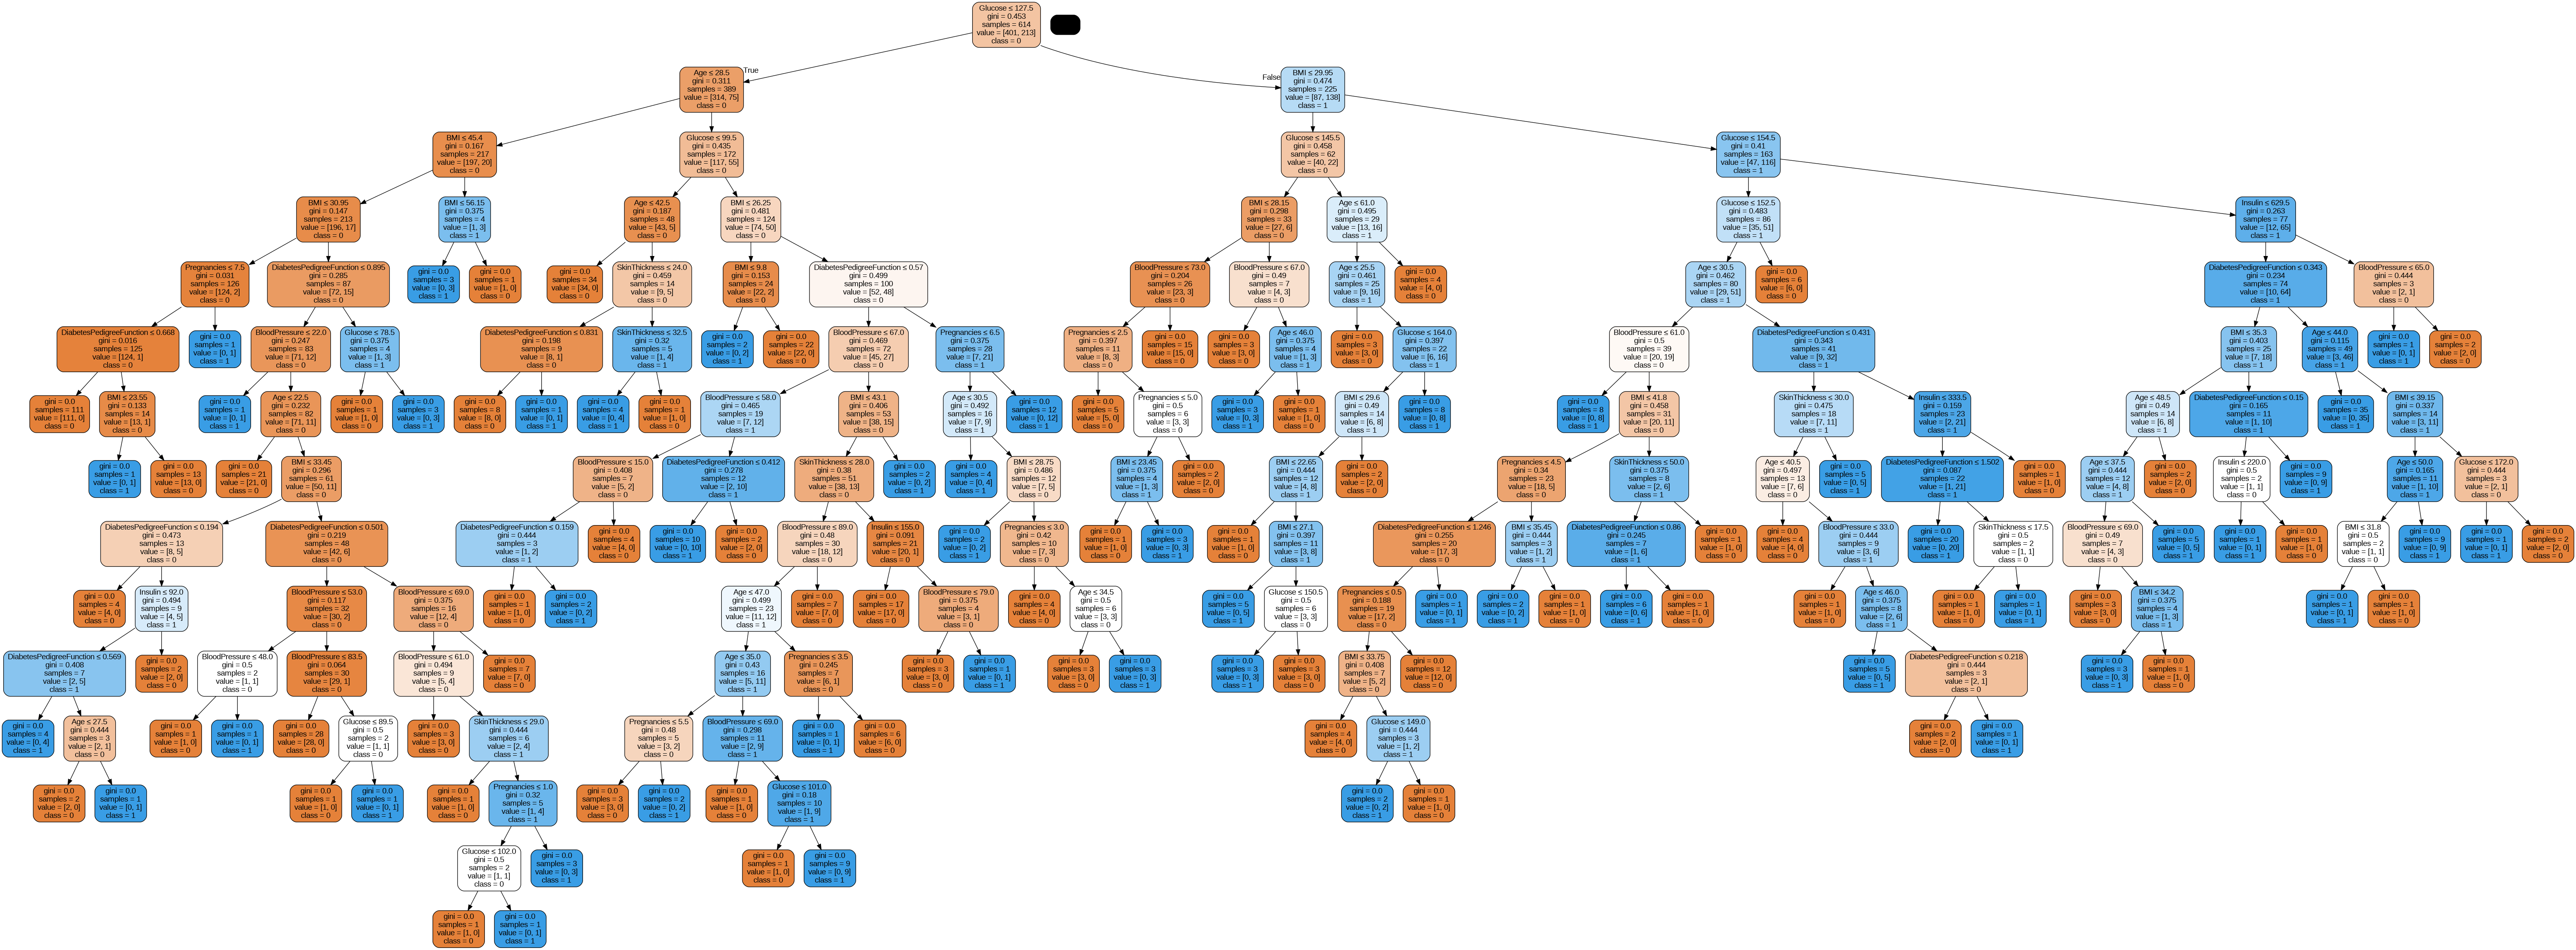

In [16]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [17]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.87012987012987


**Visualizing Decision Trees**

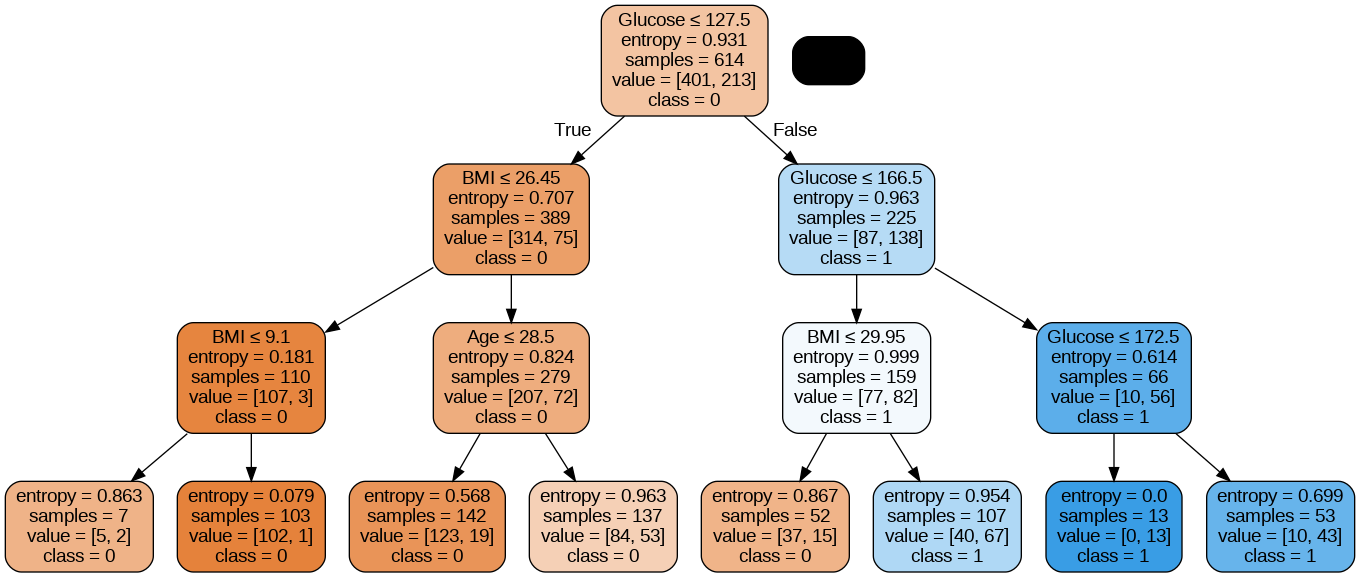

In [20]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

**Implement Random Forest**

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [400, 500, 600],
              'max_leaf_nodes': [14, 15, 16]}
random_forest = RandomForestClassifier(n_jobs=-1)

grid_search_rf = GridSearchCV(random_forest,
                              param_grid=param_grid,
                              cv=3,
                              scoring='recall',
                              return_train_score=True)
grid_search_rf.fit(x_train, y_train)
grid_search_rf.best_params_


{'max_leaf_nodes': 16, 'n_estimators': 400}

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import recall_score

print(classification_report(y_test, grid_search_rf.predict(x_test)))
print(recall_score(y_test, grid_search_rf.predict(x_test)))
print(roc_auc_score(y_test, grid_search_rf.predict_proba(x_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        99
           1       0.78      0.58      0.67        55

    accuracy                           0.79       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.79      0.79      0.78       154

0.5818181818181818
0.8786042240587695


### All the best!!! I hope you will Enjoy the Task!